In [1]:
library(tm)
library(ngram)
library(data.table)

library(Boruta)

Warning message:
"package 'tm' was built under R version 3.4.4"Loading required package: NLP
Warning message:
"package 'data.table' was built under R version 3.4.4"Warning message:
"package 'Boruta' was built under R version 3.4.4"Loading required package: ranger
Warning message:
"package 'ranger' was built under R version 3.4.4"

In [2]:
text <- readLines("out.txt",)
label <- readLines("training_labels_final.txt")

doc <- strsplit(text, '\t')
title <- strsplit(label, '\t')

In [3]:
# head(text)

In [4]:

labels <-  unlist(lapply(title, function(x) x[1]))

alabels = list()
for(i in 1:106445){
    replace = gsub(pattern = "tr_doc_\\d{1,} C", "", labels[i])
    
    if (replace != 'character(0)'){
        
        alabels[i] = replace
    }
    else{
        alabels[i] = ""
    }
   
    if(alabels[i] == "NA"){
        print(i)
    }

}
alabels <- unlist(alabels)


In [5]:
alist = list()
for(i in 1:length(text)){
    replace = gsub(",", " ", doc[i])
    
    if (replace != 'character(0)'){
        
        alist[i] = replace
    }
    else{
        alist[i] = ""
    }
   
    if(alist[i] == "NA"){
        print(i)
    }

}

In [6]:
# docs <- data.frame(cbind(alabels[1:22800], alist[1:22800]))
docs <- data.frame(cbind(alabels,unlist(alist)))
names(docs) <- c("doc_id", 'text')

In [7]:
tail(docs)

,doc_id,text
106440,23,text eleven young children died on monday when the overloaded van they were travelling in plunged into a pond east china's jiangxi province accident happened as was taking to school and all of 11 victims between four six years old henan business daily reported it said that other teacher driver survived crash which morning near city guixi xinhua news agency initially only three fatalities later eight had after transported hospital according hong kong-based information centre for human rights democracy emergency response teams took 70 minutes arrive at scene locals informed authorities group mini-van its maximum capacity just seven people roads are highly dangerous with traffic laws safety widely flouted truck drivers typically overworked fatal accidents involving vehicles also routine last year more than 62 000 state media citing police figures august 36 double-decker sleeper bus slammed rear methanol tanker burst flames worst both caught fire 39 onboard motorway occurred north shaanxi
106441,23,text japan's new ambassador to china has urged stronger economic ties with beijing after the incoming prime minister pledged mend bilateral strained by a bitter territorial row between asia's two biggest economies have become increasingly over senkaku diaoyu island chain dispute neither side willing budge months of wrangling my mission number one is improve japan-china relationship masato kitera career diplomat who will succeed uichiro niwa as told public broadcaster nhk i explain china's senior officials we need make warmer if our political cooling japanese corporate activities in are contributing chinese economy he said flared badly september tokyo nationalised islands triggering protests across that led boycotts or attacks on businesses exports tumbling 14 5 per cent on-year also boycotted various events held both countries including its decision not send finance and central bank chief for imf world meetings october sent government boats into archipelago's waters almost every day upped ante earlier this month flyover what japan was first breach airspace since 1958 it important boost exchanges fields so ease sentiment against each other mr his comments come shinzo abe saturday seek thaw report special envoy fence-mending expected take office wednesday spent much election campaign talking tough proclaimed victory there could be no negotiation sovereignty sides claim
106442,23,text a man in northern china has driven car carrying gas canister and firecrackers into crowd of schoolchildren injuring 13 state media reported on tuesday it follows wave recent attacks children which have prompted authorities to increase security around schools led calls for research the root causes such violence latest attack monday drove students hebei province official xinhua news agency said citing local police report did not say how old victims were though at school they attended would range age from 11 18 was identified as 48-year yin tiejun who described divorced without stable job according set fire bottle diesel an attempt burn after hitting officers extinguished discovered boot during questioning denied that he detained charges endangering public safety man's daughter murdered three years ago adding upset with court decision sentence all murderers death most had minor injuries but one suffered fractured skull foot bones another crushed third broken blood vessels his eyeballs officials
106443,23,text chinese police have rescued 89 children and arrested 355 suspects after busting a series of child trafficking rings officers from nine regions including fujian yunnan sichuan anhui guangdong took part in joint drive beginning december 18 against the networks director anti-trafficking office chen shiqu said are being cared for local nursing homes searching their parents official xinhua news agency reported we will collect children's dna use it to find within national database established purposes mr is serious problem china blamed on s

In [11]:
docs <- VCorpus(VectorSource(docs$text))
docs <- tm_map(docs, removeWords, stopwords("english")) # remove stop words (the most common word in a language that can be find in any document)
docs <- tm_map(docs, removePunctuation) # remove pnctuation
docs <- tm_map(docs, stemDocument) # perform stemming (reducing inflected and derived words to their root form)
docs <- tm_map(docs, removeNumbers) # remove all numbers
docs <- tm_map(docs, stripWhitespace) # remove redundant spaces 


# docs <- VCorpus(VectorSource(docs))

tdm = TermDocumentMatrix(docs)
tdm <- removeSparseTerms(tdm, 0.95)


# 

In [13]:
tdm <- removeSparseTerms(tdm, 0.05)

m <- t(as.matrix(tdm))

dim(m)
head(m)


[1] 106445      1

,text
1,1
2,1
3,1
4,1
5,1
6,1


,abc,abl,across,act,action,actual,affect,ago,ahead,allow,...,will,win,within,without,won,work,world,year,yesterday,yet
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [81]:
m <- cbind(alabels, t(m.norm))

In [100]:
train.file <- 'C:/Users/XiaoFan/Desktop/5149/A2/mmmm.csv';
data <- read.csv(train.file, header = T)

In [89]:
head(data)

X,alabels,abc,abl,across,act,action,actual,affect,ago,...,will,win,within,without,won,work,world,year,yesterday,yet
1,1,0,0,0,0.0000000,0,0.0000000,0,0,...,0.00000000,0,0,0.0000000,0,0.00000000,0,0.00000000,0.000000,0
2,1,0,0,0,0.5379485,0,0.2763549,0,0,...,0.00000000,0,0,0.0000000,0,0.00000000,0,0.08162527,0.000000,0
3,1,0,0,0,0.0000000,0,0.0000000,0,0,...,0.08467778,0,0,0.0000000,0,0.00000000,0,0.10024958,0.000000,0
4,1,0,0,0,0.0000000,0,0.0000000,0,0,...,0.00000000,0,0,0.2231947,0,0.00000000,0,0.00000000,0.202419,0
5,1,0,0,0,0.0000000,0,0.0000000,0,0,...,0.00000000,0,0,0.0000000,0,0.00000000,0,0.00000000,0.000000,0
6,1,0,0,0,0.1511180,0,0.0000000,0,0,...,0.03873620,0,0,0.0000000,0,0.09396253,0,0.00000000,0.000000,0


In [101]:
datat = as.data.table(data[, -1],keep.rownames=TRUE)
head(datat)

rn,abc,abl,across,act,action,actual,affect,ago,ahead,...,will,win,within,without,won,work,world,year,yesterday,yet
1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


# 分隔符


In [79]:
                                 
## calculate the tfidf weights
dtm_tfxidf <- weightTfIdf(tdm)

## perform k-means
m <- t(as.matrix(dtm_tfxidf))
# rownames(m) <- 1:nrow(m)

norm.eucl <- function(m) m/apply(m, MARGIN=1, FUN=function(x) sum(x^2)^.5)
# Let normalize (using euclidian distance) the tfidf weights and repeat the experiments
m.norm <- t(norm.eucl(m))

m.norm[is.na(m.norm)]=0
head(t(m.norm))  
# head(m)

,abc,abl,across,act,action,actual,affect,ago,ahead,allow,...,will,win,within,without,won,work,world,year,yesterday,yet
1,0,0,0,0.0000000,0,0.0000000,0,0,0,0,...,0.00000000,0,0,0.0000000,0,0.00000000,0,0.00000000,0.000000,0
2,0,0,0,0.5379485,0,0.2763549,0,0,0,0,...,0.00000000,0,0,0.0000000,0,0.00000000,0,0.08162527,0.000000,0
3,0,0,0,0.0000000,0,0.0000000,0,0,0,0,...,0.08467778,0,0,0.0000000,0,0.00000000,0,0.10024958,0.000000,0
4,0,0,0,0.0000000,0,0.0000000,0,0,0,0,...,0.00000000,0,0,0.2231947,0,0.00000000,0,0.00000000,0.202419,0
5,0,0,0,0.0000000,0,0.0000000,0,0,0,0,...,0.00000000,0,0,0.0000000,0,0.00000000,0,0.00000000,0.000000,0
6,0,0,0,0.1511180,0,0.0000000,0,0,0,0,...,0.03873620,0,0,0.0000000,0,0.09396253,0,0.00000000,0.000000,0


In [99]:
write.csv(m, "mmmm.csv")

In [22]:
options(warn=-1)
library(h2o)
#If there is a proxy: proxy.old <- Sys.getenv('http_proxy'); Sys.setenv('http_proxy'='');
localH2O =  h2o.init(nthreads = -1, port = 54321, startH2O = FALSE)

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         2 days 7 hours 
    H2O cluster timezone:       Australia/Sydney 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.20.0.8 
    H2O cluster version age:    23 days  
    H2O cluster name:           H2O_started_from_R_XiaoFan_tro353 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   4.32 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         Algos, AutoML, Core V3, Core V4 
    R Version:                  R version 3.4.3 (2017-11-30) 



In [50]:

labeled.frame <- h2o.importFile(path = 'C:/Users/XiaoFan/Desktop/5149/A2/m.csv' ,sep=',') 


  |======================================================================| 100%


In [51]:
head(labeled.frame)

C1,abc,abl,across,act,action,actual,affect,ago,ahead,...,will,win,within,without,won,work,world,year,yesterday,yet
1,0,0,0,0.0000000,0,0.0000000,0,0,0,...,0.00000000,0,0,0.0000000,0,0.00000000,0,0.00000000,0.000000,0
2,0,0,0,0.5379485,0,0.2763549,0,0,0,...,0.00000000,0,0,0.0000000,0,0.00000000,0,0.08162527,0.000000,0
3,0,0,0,0.0000000,0,0.0000000,0,0,0,...,0.08467778,0,0,0.0000000,0,0.00000000,0,0.10024958,0.000000,0
4,0,0,0,0.0000000,0,0.0000000,0,0,0,...,0.00000000,0,0,0.2231947,0,0.00000000,0,0.00000000,0.202419,0
5,0,0,0,0.0000000,0,0.0000000,0,0,0,...,0.00000000,0,0,0.0000000,0,0.00000000,0,0.00000000,0.000000,0
6,0,0,0,0.1511180,0,0.0000000,0,0,0,...,0.03873620,0,0,0.0000000,0,0.09396253,0,0.00000000,0.000000,0


In [52]:
head(labeled.frame[1:22800, -1])

abc,abl,across,act,action,actual,affect,ago,ahead,allow,...,will,win,within,without,won,work,world,year,yesterday,yet
0,0,0,0.0000000,0,0.0000000,0,0,0,0,...,0.00000000,0,0,0.0000000,0,0.00000000,0,0.00000000,0.000000,0
0,0,0,0.5379485,0,0.2763549,0,0,0,0,...,0.00000000,0,0,0.0000000,0,0.00000000,0,0.08162527,0.000000,0
0,0,0,0.0000000,0,0.0000000,0,0,0,0,...,0.08467778,0,0,0.0000000,0,0.00000000,0,0.10024958,0.000000,0
0,0,0,0.0000000,0,0.0000000,0,0,0,0,...,0.00000000,0,0,0.2231947,0,0.00000000,0,0.00000000,0.202419,0
0,0,0,0.0000000,0,0.0000000,0,0,0,0,...,0.00000000,0,0,0.0000000,0,0.00000000,0,0.00000000,0.000000,0
0,0,0,0.1511180,0,0.0000000,0,0,0,0,...,0.03873620,0,0,0.0000000,0,0.09396253,0,0.00000000,0.000000,0


In [77]:
Sys.time()
autoencoder <-h2o.deeplearning(    
    x = 1:ncol(labeled.frame[1:22800, -1]), # select all pixels + extra features
#     y = 1,
    training_frame = labeled.frame[1:22800, -1], # specify the frame (imported file)    
    hidden = c(750,500,300,250,125,50, 10,2,10,50, 125,250,300,500,750), # number of layers and their units
    epochs = 50, # /maximum number of epoches  
    activation = 'Tanh', # activation function 
    autoencoder = TRUE)
# recon <- mean(h2o.anomaly(autoencoder, data = labeled.frame))
project.2 <- as.matrix(h2o.deepfeatures(autoencoder, labeled.frame[1:22800, -1], layer = 8))
rm(autoencoder)
Sys.time()

[1] "2018-10-15 11:44:24 AEDT"

  |======================================================================| 100%
  |======================================================================| 100%


[1] "2018-10-15 12:02:20 AEDT"

In [15]:
train.file <- 'C:/Users/XiaoFan/Desktop/5149/A2/mm.csv';
data <- read.csv(train.file)

In [16]:
head(data)

X,alabels,abc,abl,across,act,action,actual,affect,ago,...,will,win,within,without,won,work,world,year,yesterday,yet
1,1,0,0,0,0.0000000,0,0.0000000,0,0,...,0.00000000,0,0,0.0000000,0,0.00000000,0,0.00000000,0.000000,0
2,1,0,0,0,0.5379485,0,0.2763549,0,0,...,0.00000000,0,0,0.0000000,0,0.00000000,0,0.08162527,0.000000,0
3,1,0,0,0,0.0000000,0,0.0000000,0,0,...,0.08467778,0,0,0.0000000,0,0.00000000,0,0.10024958,0.000000,0
4,1,0,0,0,0.0000000,0,0.0000000,0,0,...,0.00000000,0,0,0.2231947,0,0.00000000,0,0.00000000,0.202419,0
5,1,0,0,0,0.0000000,0,0.0000000,0,0,...,0.00000000,0,0,0.0000000,0,0.00000000,0,0.00000000,0.000000,0
6,1,0,0,0,0.1511180,0,0.0000000,0,0,...,0.03873620,0,0,0.0000000,0,0.09396253,0,0.00000000,0.000000,0


In [20]:
recon <- mean(h2o.anomaly(autoencoder, data = labeled.frame))

In [78]:
project.2


DF.L8.C1,DF.L8.C2
0.06892901,-0.11216177
-0.11195317,0.16770343
-0.03851216,-0.34713872
-0.04785443,-0.05519272
-0.25899335,0.31763757
0.08916842,-0.04573454
0.13562002,0.19928365
0.25823792,-0.11180884
-0.03321397,-0.19440796
-0.22005796,0.10661499


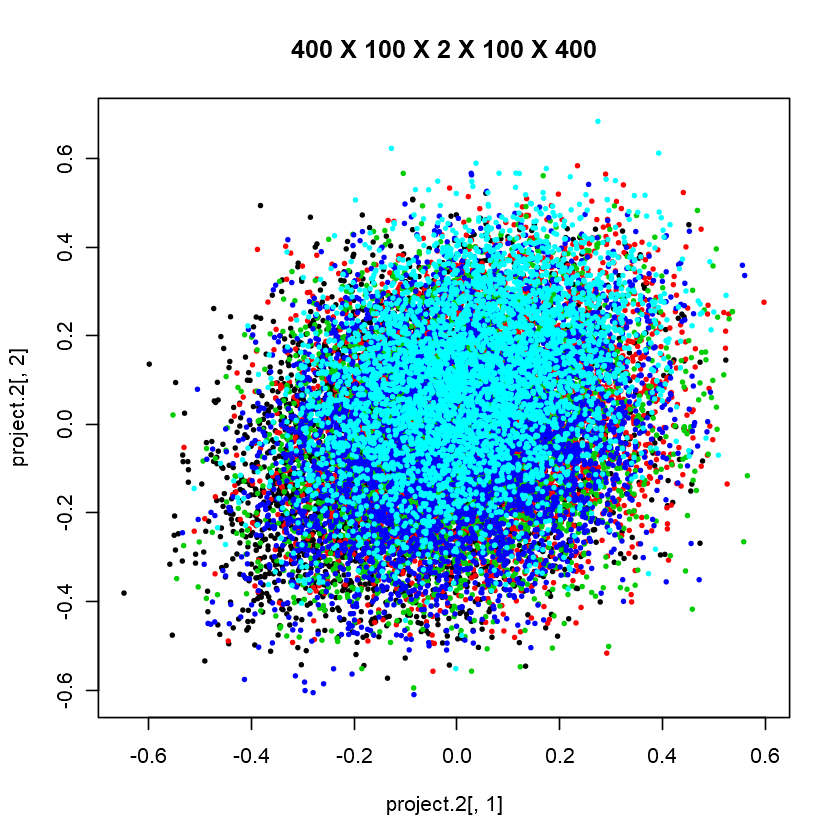

In [79]:

plot(project.2[,1], project.2[,2],col=alabels[1:22800], pch=16, cex=0.5, main='400 X 100 X 2 X 100 X 400')


In [1]:
library(e1071)

Warning message:
"package 'e1071' was built under R version 3.4.4"

In [129]:
Sys.time()
# svv <-svm.default(x = data1, y = label, type ="C-classification",  cross =10)
sv <- svm(m[1:22800, ], y = alabels[1:22800], scale = TRUE,type ="C-classification")
Sys.time()

[1] "2018-10-10 22:37:00 AEDT"

Warning message in svm.default(m[1:22800, ], y = alabels[1:22800], scale = TRUE, :
"Variable(s) 'text' constant. Cannot scale data."

[1] "2018-10-10 22:47:25 AEDT"

In [107]:
Sys.time()
# svv <-svm.default(x = data1, y = label, type ="C-classification",  cross =10)
sv <- svm(t(m.norm)[1:22800,],y = alabels[1:22800], scale = TRUE,type ="C-classification", kernel = "linear", cross = 10)
Sys.time()

[1] "2018-10-15 16:15:04 AEDT"

[1] "2018-10-15 16:33:33 AEDT"

In [109]:
summary(sv)


Call:
svm.default(x = t(m.norm)[1:22800, ], y = alabels[1:22800], scale = TRUE, 
    type = "C-classification", kernel = "linear", cross = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.002785515 

Number of Support Vectors:  12217

 ( 2027 3221 2372 3997 600 )


Number of Classes:  5 

Levels: 
 1 2 3 4 5

10-fold cross-validation on training data:

Total Accuracy: 72.40351 
Single Accuracies:
 73.68421 71.27193 73.94737 70.74561 73.59649 71.40351 72.89474 71.22807 72.7193 72.54386 




In [108]:
table(sv$fitted, y = alabels[1:22800])

   y
       1    2    3    4    5
  1 3474  267  117  574   39
  2  232 3066  567  760   38
  3   95  433 2843  392   21
  4  498  857  537 3639   75
  5   21   17   16   75 4147

In [105]:
(3474+3066+2843+3639+4147)/22800

[1] 0.7530263

In [95]:
cl =kmeans(t(m.norm)[1:22800,],centers = 5)

In [96]:
table(cl$cluster, y = alabels[1:22800])

   y
       1    2    3    4    5
  1 1197  486  630  895  339
  2 1195 1114 1014 1345 1411
  3  417  889  547  745 1384
  4  900  909  988 1188  412
  5  611 1242  901 1267  774

In [92]:
(2860+2721+1624+3741+3741)/22800

[1] 0.6441667

In [ ]:
tune.svm(x = )

In [ ]:
tuned<-tune.svm(x = data[1:12800, -1:-2], y = data[1:12800, 2] ,gamma = 10^(-6:-1),cost = 10^(1:2), 
                kernel = "linear")

Warning message in svm.default(structure(list(abc = c(0, 0, 0, 0, 0, 0, 0, 0, 0, :
"Variable(s) 'text' constant. Cannot scale data."Warning message in svm.default(structure(list(abc = c(0, 0, 0, 0, 0, 0, 0.218941143745997, :
"Variable(s) 'text' constant. Cannot scale data."Warning message in svm.default(structure(list(abc = c(0, 0, 0, 0, 0, 0, 0.218941143745997, :
"Variable(s) 'text' constant. Cannot scale data."Warning message in svm.default(structure(list(abc = c(0, 0, 0, 0, 0, 0, 0.218941143745997, :
"Variable(s) 'text' constant. Cannot scale data."Warning message in svm.default(structure(list(abc = c(0, 0, 0, 0, 0, 0, 0.218941143745997, :
"Variable(s) 'text' constant. Cannot scale data."Warning message in svm.default(structure(list(abc = c(0, 0, 0, 0, 0, 0, 0.218941143745997, :
"Variable(s) 'text' constant. Cannot scale data."Warning message in svm.default(structure(list(abc = c(0, 0, 0, 0, 0, 0, 0.218941143745997, :
"Variable(s) 'text' constant. Cannot scale data."Warning message 